## Application 1 : Tester les performances d'un réseau avant et après entraînement

### Objectif : découvrir les réseaux de neurones 

Dans cet exercice, nous allons utiliser un réseau de neurone capable de distinguer les chiens et les chats. Nous allons procéder en plusieurs étapes :

1. Explorer le jeu de données 
2. Initialiser le réseau de neurones 
2. Évaluer le modèle avant entraînement 
3. Évaluer le modèle après entraînement 
4. Tester le réseau de neurones avec une image quelconque


**Let's go!**

Ici on importe la boîte à outils contenant le code qui permet de faire cette activité.

In [1]:
import toolbox as toolbox


Hi
2.4.0


### Étape 1 : Explorer le jeu de données

Commençons par télécharger notre jeu de données. Il s'agit d'un .zip de 2000 images au format JPG de chiens et de chat. Ce jeu de données va être extrait dans un répertoire local temporaire. 

**NOTE:** Les 2000 images utilisées dans cet exercice sont tirées du jeu de données ["Dogs vs. Cats" dataset](https://www.kaggle.com/c/dogs-vs-cats/data) disponible sur Kaggle contenant à la base 25 000 images. Ici on utilise une petite partie du jeu de données complet afin de réduire le temps d'entrainement à des fins éducatives. 

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
['cats', 'dogs']


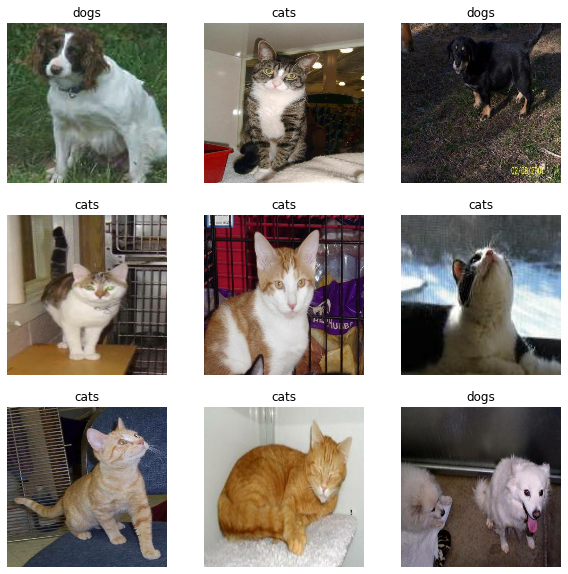

In [2]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

BATCH_SIZE = 32
IMG_SIZE = (160, 160)

train_dataset, validation_dataset, test_dataset, class_names = toolbox.load_dataset(_URL, BATCH_SIZE, IMG_SIZE)
print(class_names)

### Étape 2 : Créer le réseau de neurones

L'architecture de réseau utilisée est celle d'un mobileNet. Ce réseau fait partie des réseaux de neurones à convolutions, très adapté pour les problèmes appliqués aux images. 
Dans cette activité on utilise un réseau pré-entraîné. C'est à dire qu'on utilise les poids d'un réseau qui a déjà été entraîné avec le jeu de données ImageNet. Cela accélère grandement l'apprentissage car le réseau a déjà appris des caractéristiques. Et on rajoute une couche à notre réseau, ce qui permet de le spécialiser sur notre problème. Ici faire la différence entre un chien et un chat 

In [3]:
model = toolbox.create_model(train_dataset, IMG_SIZE)

(32, 5, 5, 1280)
(32, 1280)
(32, 1)
Number of layers in the base model:  154
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 160, 160, 3)]     0         
_________________________________________________________________
sequential (Sequential)      (None, 160, 160, 3)       0         
_________________________________________________________________
tf.math.truediv (TFOpLambda) (None, 160, 160, 3)       0         
_________________________________________________________________
tf.math.subtract (TFOpLambda (None, 160, 160, 3)       0         
_________________________________________________________________
mobilenetv2_1.00_160 (Functi (None, 5, 5, 1280)        2257984   
_________________________________________________________________
global_max_pooling2d (Global (None, 1280)              0         
__________________________________________________

### Étape 3 : Évaluer le réseau avant entraînement 

**Note** 

La valeur **loss** correspond à l'erreur déterminée par une fonction de perte utilisée dans le réseau. Cette fonction permet d'exprimer à quel point la sortie calculée par le réseau est éloignée de la sortie attendue (label initial). Plus la valeur est basse moins il y a d'erreur. 

La valeur d'**accuracy** permet de mesurer la fréquence à laquelle l'algorithme classe correctement une image parmi toutes les images. Plus la valeur est haute et plus le réseau classe correctement les données.


In [4]:
loss0, accuracy0 = toolbox.evaluate_model(test_dataset, model)

print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))


6/6 [==============================] - 4s 331ms/step - loss: 1.9176 - accuracy: 0.5311
initial loss: 1.68
initial accuracy: 0.55


### Étape 4 : Évaluer le réseau après entraînement

L'apprentissage d'un modèle peut prendre du temps. Ici, on importe le modèle initialisé ci-dessus après entraînement.

In [5]:
saved_model=new_model = 'my_model2.h5'

trained_model=toolbox.load_model(saved_model)

loss, accuracy = toolbox.evaluate_model(test_dataset, trained_model)

print("initial loss: {:.2f}".format(loss))
print("initial accuracy: {:.2f}".format(accuracy))


6/6 [==============================] - 3s 380ms/step - loss: 0.1947 - accuracy: 0.9583
initial loss: 0.19
initial accuracy: 0.96


### Étape 5 : Tester le réseau 

**Note** Au cours de l'entraînement on utilise le ```training_dataset``` et le ```validation_dataset```. Pour tester notre modèle on se sert du ```test_dataset```.

**Note 2** Les labels correspondent aux étiquettes affectées aux images avant de les donner au réseau de neurone comme données d'apprentissage. Il s'agit des sorties que l'on s'attend à avoir en prédiction. En entrée du réseau, on fournit des images. En sortie on a une liste de probabilité d'appartenance à une classe de l'image d'entrée. La somme des probabilités est égale à 1. 

#### Test des performances du réseau sur le model avant entraînement 




Predictions:
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
Labels:
 [0 0 0 1 0 1 0 1 0 1 0 0 1 1 0 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0 1 0]


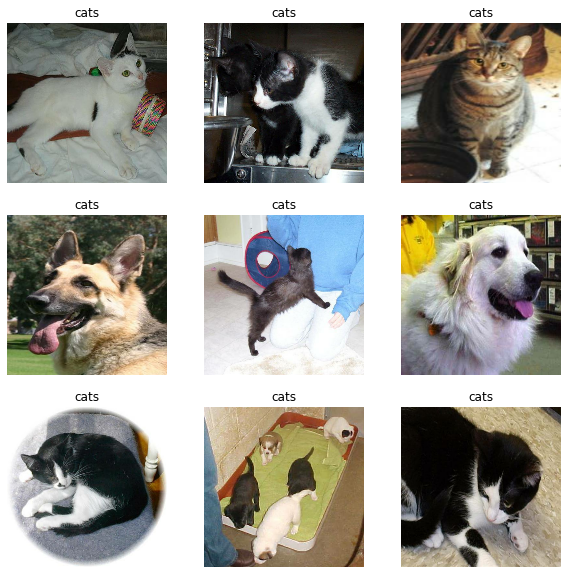

In [6]:
toolbox.test_model(test_dataset, model, class_names)

#### Test du modèle après entraînement

Predictions:
 [0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 1 0 0 1 0 1 1 0 1]
Labels:
 [0 0 0 1 0 1 1 0 0 0 0 1 1 0 0 1 0 1 0 0 1 1 1 1 0 0 1 0 1 1 0 1]


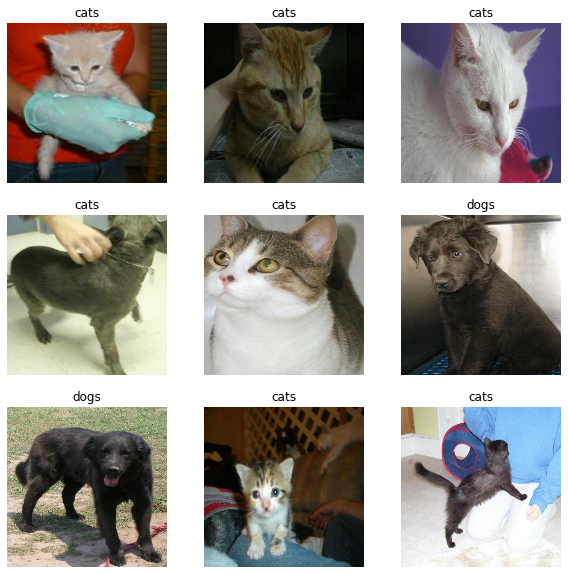

In [7]:
toolbox.test_model(test_dataset, trained_model, class_names)

#### Test sur une image personnelle

Allez chercher l'image de votre animal de compagnie favori et remplacez la valeur de la variable ```img_path``` par l'url de votre image.

**Exemple**: ```img_path= "https://live.staticflickr.com/5504/14187029688_46e25edbf1_k.jpg "```

In [9]:
img_path=None
toolbox.img_test(img_path, trained_model, class_names)

TypeError: expected string or bytes-like object